### Student Information
Name: 匡立恆

Student ID: D1104183039

GitHub ID: VictorKuanglhu

Kaggle name: VictorKuang_lhu

Kaggle private scoreboard snapshot:![pic0.png](https://github.com/VictorKuanglhu/DM2024-Lab2-Homework/blob/main/img/pic0.png?raw=true)



---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.





2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:

    - **Bottom 40%**: Get 20% of the 30% available for this section.



    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   

    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.

    



3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.





4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.





Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.



Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [1]:
### Begin Assignment Here

## Table of Contents
1. Data Preparation
 - EDA

2. Feature engerning and model training
 - train a pos/neg classifier
 - positive emotion classifier training
 - negitive emotion classifier training

3. Evaluation

4. Predict and Submission

5. Report for this competition
 - Introduction
 - Methodology
 - Conclusion

---

# 1.Data Preparation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

tweets_json = pd.read_json('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json', lines=True)
emotion_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
data_identification_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')
print('Data loaded')

tweets_df = pd.concat([pd.json_normalize(tweets_json["_source"]), tweets_json[['_score','_crawldate']]], axis=1)
tweets_df.columns = [col.split('.')[-1] for col in tweets_df.columns]

train_df = data_identification_df[data_identification_df['identification'] == 'train'].drop(columns=['identification'])
train_df = pd.merge(train_df, tweets_df, on='tweet_id', how='left')
train_df = pd.merge(train_df, emotion_df, on='tweet_id', how='left')
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state=42)
print(f'Training dataset prepared, shape: {train_df.shape}.')
print(f'Validation dataset prepared, shape: {val_df.shape}.')

test_df = data_identification_df[data_identification_df['identification'] == 'test'].drop(columns=['identification'])
test_df = pd.merge(test_df, tweets_df, on='tweet_id', how='left')
print(f'Testing dataset prepared, shape: {test_df.shape}.')


train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)
print("'train.csv', 'val.csv' and 'test.csv' saved")

Data loaded
Training dataset prepared, shape: (1382784, 6).
Validation dataset prepared, shape: (72779, 6).
Testing dataset prepared, shape: (411972, 5).
'train.csv', 'val.csv' and 'test.csv' saved


In [3]:
train_df.head(3)

,tweet_id,hashtags,text,_score,_crawldate,emotion
662505,0x31c10b,"[whole, God]",The #whole armour of #God.,732,2015-04-26 14:04:16,anticipation
1337868,0x29d7ca,[],"@Protrump45 @realDonaldTrump No healthcare, no...",111,2017-08-21 16:45:12,sadness
1091168,0x263758,"[safehouse, itv, itdoesnttakealot]",I have just watched Safe House on @ITV but I a...,358,2017-08-04 08:20:50,sadness


In [4]:
val_df.head(3)

,tweet_id,hashtags,text,_score,_crawldate,emotion
970345,0x2958f8,"[SupportingRape, patheticalllllly]",@LGisTheCure YOU SAID WHAT YOU SAID. #Supporti...,769,2015-05-08 23:00:01,disgust
1145883,0x22f2bf,[],@boring_as_heck Ah good. Capitalize on that sw...,649,2015-07-12 23:38:05,joy
468264,0x314c17,[],🇵🇷🇲🇽 <LH> for the World 😩,206,2016-10-21 17:53:19,anticipation


In [5]:
test_df.head(3)

,tweet_id,hashtags,text,_score,_crawldate
0,0x28cc61,[],@Habbo I've seen two separate colours of the e...,107,2017-01-17 14:13:32
1,0x2db41f,[],@FoxNews @KellyannePolls No serious self respe...,728,2015-10-17 06:46:20
2,0x2466f6,[womendrivers],"Looking for a new car, and it says 1 lady owne...",491,2016-12-19 03:50:27


## EDA

##### Check if the data is complete

In [6]:
print(len(data_identification_df) == len(emotion_df)+len(test_df))

True


##### Distribution of training dataset

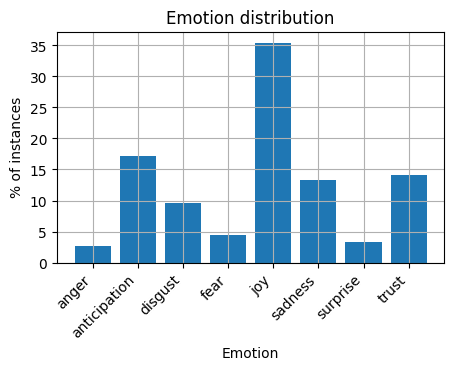

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# data group by emotion
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

From the plot of emotion distribution, we can observe that the tweets_DM dataset is quite imbalanced. Tweets with positive emotions, such as joy, anticipation, and trust, dominate the dataset. This suggests that people are more likely to tweet when something good happens. Based on this observation, it is essential to address the class imbalance, either by applying appropriate data balancing techniques or by selecting algorithms that are robust to imbalanced datasets.

---

# 2.Feature engerning and model training

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

##### Manually split the dataset into positive and negative emotions, and train a classifier for pos/neg sentiment using a subset of the training dataset.



In [9]:
# Label emotions as positive (1) or negative (0) in the train and validation datasets
import pandas as pd

pos_emo = ('anticipation', 'joy', 'surprise', 'trust')
neg_emo = ('anger', 'disgust', 'fear', 'sadness')

train_df['emotion_type'] = train_df['emotion'].isin(pos_emo)*1
val_df['emotion_type'] = val_df['emotion'].isin(pos_emo)*1

In [10]:
train_df.head(3)

,tweet_id,hashtags,text,_score,_crawldate,emotion,emotion_type
662505,0x31c10b,"[whole, God]",The #whole armour of #God.,732,2015-04-26 14:04:16,anticipation,1
1337868,0x29d7ca,[],"@Protrump45 @realDonaldTrump No healthcare, no...",111,2017-08-21 16:45:12,sadness,0
1091168,0x263758,"[safehouse, itv, itdoesnttakealot]",I have just watched Safe House on @ITV but I a...,358,2017-08-04 08:20:50,sadness,0


In [11]:
val_df.head(3)

,tweet_id,hashtags,text,_score,_crawldate,emotion,emotion_type
970345,0x2958f8,"[SupportingRape, patheticalllllly]",@LGisTheCure YOU SAID WHAT YOU SAID. #Supporti...,769,2015-05-08 23:00:01,disgust,0
1145883,0x22f2bf,[],@boring_as_heck Ah good. Capitalize on that sw...,649,2015-07-12 23:38:05,joy,1
468264,0x314c17,[],🇵🇷🇲🇽 <LH> for the World 😩,206,2016-10-21 17:53:19,anticipation,1


In [12]:
# train_data = train_df[['text','emotion_type','emotion']]
train_data = train_df[['text','emotion_type','emotion']][:100000]
val_data = val_df[['text','emotion_type','emotion']][:3000]

In [13]:
%%time

# Transform text data into feature vectors using the BOW model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# nltk.download('punkt_tab')

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

X_train = BOW_500.fit_transform(train_data['text'])
y_train = train_data['emotion_type']
X_val = BOW_500.transform(val_data['text'])
y_val = val_data['emotion_type']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 19.7 s, sys: 66.4 ms, total: 19.8 s
Wall time: 20 s


In [14]:
"😂" in BOW_500.get_feature_names_out()

True

In [15]:
%%time

# Train a classifier for pos/neg sentiment using a subset of the training dataset.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train[:X_train.shape[0]//10], y_train[:X_train.shape[0]//10])

y_val_pred = nb_classifier.predict(X_val)

print(classification_report(y_true=y_val, y_pred=y_val_pred, labels=nb_classifier.classes_))
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred, labels=nb_classifier.classes_)
# plot_confusion_matrix(cm, classes=nb_classifier.classes_)

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       903
           1       0.81      0.82      0.82      2097

    accuracy                           0.74      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.74      0.74      0.74      3000

CPU times: user 38.5 ms, sys: 16.1 ms, total: 54.6 ms
Wall time: 141 ms


In [16]:
val_data['emotion_type_pred'] = y_val_pred
val_data.head(3)

,text,emotion_type,emotion,emotion_type_pred
970345,@LGisTheCure YOU SAID WHAT YOU SAID. #Supporti...,0,disgust,0
1145883,@boring_as_heck Ah good. Capitalize on that sw...,1,joy,1
468264,🇵🇷🇲🇽 <LH> for the World 😩,1,anticipation,1


Train separate Naive Bayes classifiers for pos_emo('anticipation', 'joy', 'surprise', 'trust') and neg_emo('anger', 'disgust', 'fear', 'sadness') to predict specific emotions.


              precision    recall  f1-score   support

anticipation       0.64      0.44      0.52       423
         joy       0.46      0.93      0.61       862
    surprise       0.56      0.08      0.15        59
       trust       0.66      0.16      0.26       382

   micro avg       0.49      0.61      0.54      1726
   macro avg       0.58      0.40      0.38      1726
weighted avg       0.55      0.61      0.50      1726



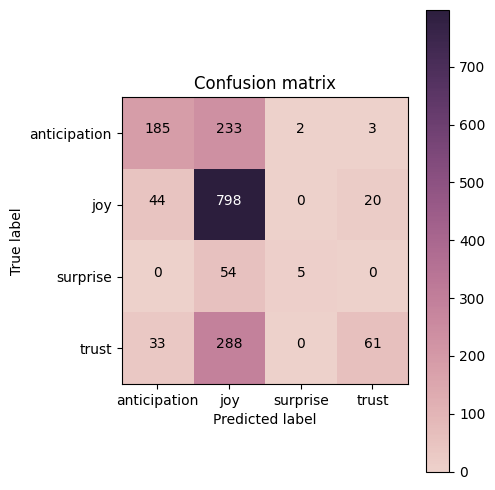

CPU times: user 17.1 s, sys: 231 ms, total: 17.4 s
Wall time: 17.1 s


In [19]:
%%time

# Positive emotions classifiers
from imblearn.under_sampling import RandomUnderSampler

# Initialize TF-IDF vectorizer for positive emotion classification
pos_tfidf_vectorizer = TfidfVectorizer(
    max_features=1000, 
    tokenizer=nltk.word_tokenize,
    ngram_range=(1, 2), 
    stop_words='english', )

# Transform the training and validation text data for positive emotions
X_train_pos_tfidf = pos_tfidf_vectorizer.fit_transform(train_data[train_data['emotion_type'] == 1]['text'])
y_train_pos = train_data[train_data['emotion_type'] == 1]['emotion']
X_val_pos_tfidf = pos_tfidf_vectorizer.transform(val_data[val_data['emotion_type_pred'] == 1]['text'])
y_val_pos = val_data[val_data['emotion_type_pred'] == 1]['emotion']

# Handle data imbalance using RandomUnderSampler
# undersampler = RandomUnderSampler()
# X_train_pos_tfidf_resampled, y_train_pos_resampled = undersampler.fit_resample(X_train_pos_tfidf, y_train_pos)
# print(y_train_pos_resampled.groupby(y_train_pos_resampled.values).count())
X_train_pos_tfidf_resampled, y_train_pos_resampled = X_train_pos_tfidf, y_train_pos

# Train
pos_nb_classifier = MultinomialNB()
pos_nb_classifier.fit(X_train_pos_tfidf_resampled, y_train_pos_resampled)

# Predictions and evaluate on the validation set 
y_val_pos_pred = pos_nb_classifier.predict(X_val_pos_tfidf)

print(classification_report(y_true=y_val_pos, y_pred=y_val_pos_pred, labels=pos_nb_classifier.classes_))
cm = confusion_matrix(y_true=y_val_pos, y_pred=y_val_pos_pred, labels=pos_nb_classifier.classes_)
plot_confusion_matrix(cm, classes=pos_nb_classifier.classes_)

val_data.loc[val_data['emotion_type_pred'] == 1, 'emotion_pred'] = y_val_pos_pred

In [21]:
# # Evaluation on rebalanced validation set 
# X_val_pos_tfidf_resampled, y_val_pos_resampled = undersampler.fit_resample(X_val_pos_tfidf, y_val_pos)

# y_val_pos_pred = pos_nb_classifier.predict(X_val_pos_tfidf_resampled)

# print(classification_report(y_true=y_val_pos_resampled, y_pred=y_val_pos_pred, labels=pos_nb_classifier.classes_))
# cm = confusion_matrix(y_true=y_val_pos_resampled, y_pred=y_val_pos_pred, labels=pos_nb_classifier.classes_)
# plot_confusion_matrix(cm, classes=pos_nb_classifier.classes_)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

       anger       0.60      0.08      0.14        37
     disgust       0.31      0.51      0.38       152
        fear       0.35      0.17      0.23        46
     sadness       0.36      0.80      0.49       261

   micro avg       0.34      0.60      0.44       496
   macro avg       0.40      0.39      0.31       496
weighted avg       0.36      0.60      0.41       496



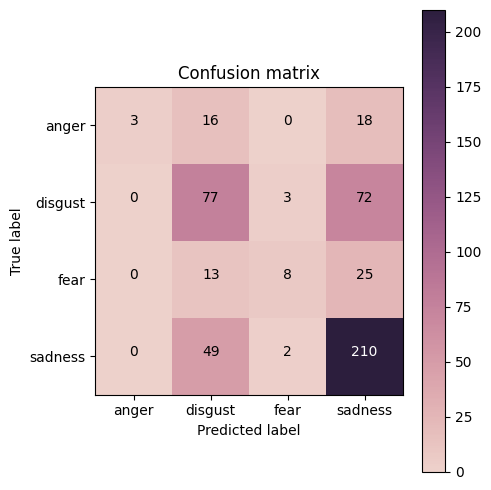

CPU times: user 7.85 s, sys: 221 ms, total: 8.07 s
Wall time: 7.73 s


In [22]:
%%time

# Negative emotions classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Initialize TF-IDF vectorizer for negative emotion classification
neg_tfidf_vectorizer = TfidfVectorizer(
    max_features=1000, 
    tokenizer=nltk.word_tokenize,
    ngram_range=(1, 2), 
    stop_words='english', )

# Transform the training and validation text data for negative emotions
X_train_neg_tfidf = neg_tfidf_vectorizer.fit_transform(train_data[train_data['emotion_type'] == 0]['text'])  # Transform text into a TF-IDF feature matrix
y_train_neg = train_data[train_data['emotion_type'] == 0]['emotion']
X_val_neg_tfidf = neg_tfidf_vectorizer.transform(val_data[val_data['emotion_type_pred'] == 0]['text'])
y_val_neg = val_data[val_data['emotion_type_pred'] == 0]['emotion']

# Handle data imbalance using RandomUnderSampler
# undersampler = RandomUnderSampler()
# X_train_neg_tfidf, y_train_neg = undersampler.fit_resample(X_train_neg_tfidf, y_train_neg)
# print(y_train_neg.groupby(y_train_neg.values).count())
X_train_neg_tfidf, y_train_neg = X_train_neg_tfidf, y_train_neg

# Train
neg_nb_classifier = MultinomialNB()
neg_nb_classifier.fit(X_train_neg_tfidf, y_train_neg)

# Predictions and evaluate on the validation set 
y_val_neg_pred = neg_nb_classifier.predict(X_val_neg_tfidf)

print(classification_report(y_true=y_val_neg, y_pred=y_val_neg_pred, labels=neg_nb_classifier.classes_))
cm = confusion_matrix(y_true=y_val_neg, y_pred=y_val_neg_pred, labels=neg_nb_classifier.classes_)
plot_confusion_matrix(cm, classes=neg_nb_classifier.classes_)

val_data.loc[val_data['emotion_type_pred'] == 0, 'emotion_pred'] = y_val_neg_pred

In [23]:
# # Evaluation on rebalanced validation set 
# X_val_neg_tfidf_resampled, y_val_neg_resampled = undersampler.fit_resample(X_val_neg_tfidf, y_val_neg)

# y_val_neg_pred = neg_nb_classifier.predict(X_val_neg_tfidf_resampled)

# print(classification_report(y_true=y_val_neg_resampled, y_pred=y_val_neg_pred, labels=neg_nb_classifier.classes_))
# cm = confusion_matrix(y_true=y_val_neg_resampled, y_pred=y_val_neg_pred, labels=neg_nb_classifier.classes_)
# plot_confusion_matrix(cm, classes=neg_nb_classifier.classes_)

---

# 3.Evaluation

In [24]:
val_data.head(3)

,text,emotion_type,emotion,emotion_type_pred,emotion_pred
970345,@LGisTheCure YOU SAID WHAT YOU SAID. #Supporti...,0,disgust,0,disgust
1145883,@boring_as_heck Ah good. Capitalize on that sw...,1,joy,1,joy
468264,🇵🇷🇲🇽 <LH> for the World 😩,1,anticipation,1,joy


              precision    recall  f1-score   support

       anger       0.60      0.04      0.07        80
anticipation       0.64      0.36      0.46       511
     disgust       0.31      0.28      0.30       271
        fear       0.35      0.06      0.10       141
         joy       0.46      0.77      0.58      1031
     sadness       0.36      0.51      0.42       411
    surprise       0.56      0.05      0.09       107
       trust       0.66      0.14      0.23       448

    accuracy                           0.45      3000
   macro avg       0.49      0.28      0.28      3000
weighted avg       0.49      0.45      0.40      3000



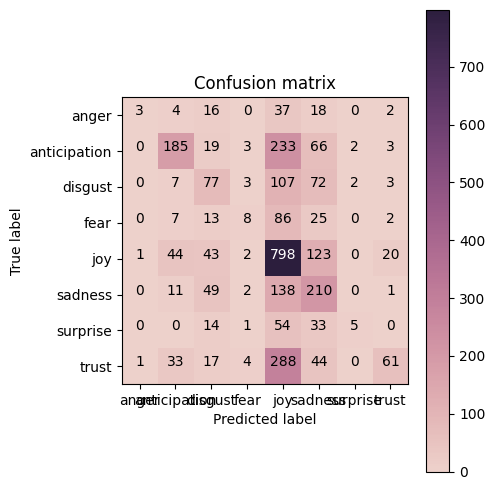

In [25]:
print(classification_report(y_true=val_data['emotion'], y_pred=val_data['emotion_pred']))
cm = confusion_matrix(y_true=val_data['emotion'], y_pred=val_data['emotion_pred'])
plot_confusion_matrix(cm, ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust'])

---

# 4.Predict and Submission

In [29]:
test_data = pd.DataFrame()

X_test = BOW_500.transform(test_df['text'])
y_test_pred = nb_classifier.predict(X_test)

test_data['emotion_type_pred'] = y_test_pred

# pos
X_test_pos_tfidf = pos_tfidf_vectorizer.transform(test_df[test_data['emotion_type_pred'] == 1]['text'])
y_test_pos_pred = pos_nb_classifier.predict(X_test_pos_tfidf)
test_data.loc[test_data['emotion_type_pred'] == 1, 'emotion_pred'] = y_test_pos_pred
# neg
X_test_neg_tfidf = neg_tfidf_vectorizer.transform(test_df[test_data['emotion_type_pred'] == 0]['text'])
y_test_neg_pred = neg_nb_classifier.predict(X_test_neg_tfidf)
test_data.loc[test_data['emotion_type_pred'] == 0, 'emotion_pred'] = y_test_neg_pred

test_data.head(3)

,emotion_type_pred,emotion_pred
0,0,sadness
1,0,sadness
2,1,joy


In [30]:
submission = pd.DataFrame()
submission['id'], submission['emotion'] = test_df['tweet_id'], test_data['emotion_pred']
submission.head(3)

,id,emotion
0,0x28cc61,sadness
1,0x2db41f,sadness
2,0x2466f6,joy


In [31]:
submission.to_csv('submission.csv', index=False)

In [ ]:
pd.read_csv('/kaggle/working/submission.csv')

---

# 5.Report for this compitition

### Introduction

This project focuses on classifying emotions from tweets. Initial analysis of the training dataset showed a highly imbalanced class distribution. As a baseline, I used Bag-of-Words (BOW) to extract features and trained a Naive Bayes classifier, which works well with weakly correlated features. The baseline model achieved a public score of 0.33. To improve the model's performance and address the class imbalance, I designed additional methods sub-classifiers.

#### Undersampling Experiment

To ensure fairer training across all classes, I applied undersampling to balance the training data. This approach resulted in a lower final score compared to the baseline, likely because the test dataset shared a similar class distribution with the original training dataset, favoring the baseline’s bias tog the test set's distribution.e with additional training data or ensemble methods.

### Methodology

#### Baseline Model

The baseline used a simple Naive Bayes classifier with BOW features trained on the imbalanced dataset. This model provided a starting point with a public score of 0.33.

#### Two-Stage Classification

To handle the imbalance, I grouped emotions into positive and negative categories. A two-stage model was implemented:
1. A primary classifier to separate tweets into positive or negative sentiments using a small portion of the training data.
2. Separate classifiers were trained on positive and negative tweets to predict specific emotions.

The aim was to improve classification by narrowing the scope of each model and reducing the impact of imbalance. However, the final score remained similar to the baseline, likely due to error propagation between the stages and limited training data for the sub-classifiers.


### Conclusion

The baseline Naive Bayes model with BOW features provided stable performance. Attempts to improve it by handling class imbalance, including two-stage classification and undersampling, did not achieve better results. The likely reasons were errors introduced in the two-stage model and mismatch between training and test data in the undersampling method.

To improve performance, future work could include using advanced models like BERT or exploring synthetic data augmentation to handle imbalance while preserving the test set's distribution.